 #82=IfcAlignment('2KGn1xF3X8if58b_IhhYjI',$,'Dummy',$,$,#81,#94,$)
   #75=IfcAlignmentHorizontal('2Xya6$ki1DMueeYlhqU$3x',$,'Dummy - Horizontal',$,$,$,$)
     #11=IfcAlignmentSegment('2Bo3EVrIDCYO4U98vGMh0l',$,'H1',$,$,#81,#96,#10)
     #21=IfcAlignmentSegment('2ScK8LfnfDROgYLRMKVCsg',$,'H2',$,$,#81,#98,#20)
   #77=IfcAlignmentVertical('0Z4zLKd75AigcAWcG70Qi$',$,'Dummy - Vertical',$,$,$,$)
     #32=IfcAlignmentSegment('39D$50MD57Pf5loZIkibzf',$,'V1',$,$,#81,#100,#31)
     #43=IfcAlignmentSegment('0n_bWsn2HCLgW3OQ35y4ps',$,'V2',$,$,#81,#102,#42)
     #54=IfcAlignmentSegment('1DKfR7ECrBcv_Jh2EnJW1G',$,'V3',$,$,#81,#104,#53)
     #65=IfcAlignmentSegment('34wuSWXnfCQg1UQylGBs3j',$,'V4',$,$,#81,#106,#64)
   #86=IfcReferent('1bTOxEc$v3yx9xf$laCakl',$,'Start Station',$,$,#85,$,.STATION.)
#74=IfcGradientCurve((#40,#51,#62,#73),.F.,#29,$)


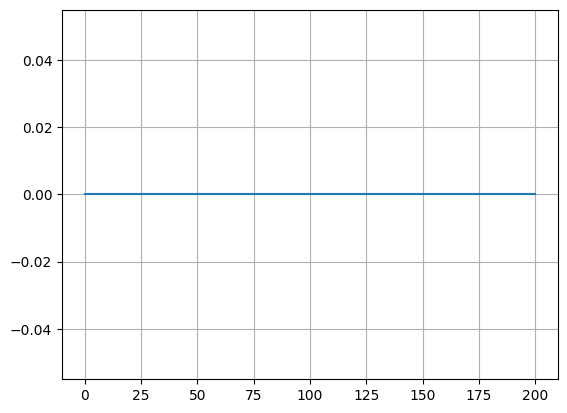

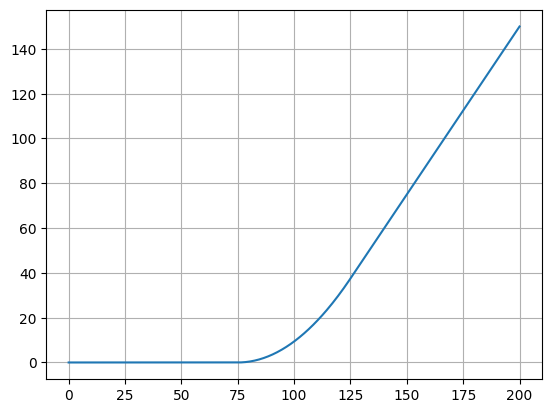

In [1]:
import ifcopenshell
import ifcopenshell.api
from ifcopenshell.api import run
import ifcopenshell.alignment
import numpy as np
import matplotlib.pyplot as plt

model = ifcopenshell.file(schema="IFC4X3_ADD2")

project = run("root.create_entity", model, ifc_class="IfcProject", name="Dummy")

geometric_representation_context = run("context.add_context",model,context_type="Model")
axis_model_representation_subcontext = model.createIfcGeometricRepresentationSubContext(
    ContextIdentifier="Axis",
    ContextType="Model",
    ParentContext=geometric_representation_context,
    TargetView="MODEL_VIEW")

fig1 = plt.figure().add_subplot()
fig2 = plt.figure().add_subplot()
fig1.grid(True)
fig2.grid(True)
#fig2.axis("square")

coordinates = [(0.0,0.0),(500.0,0.0)]
radii = []
vpoints = [(0.0,0.0),(100.0,0.0),(200.0,150.0)]
lengths = [(50.)]

#coordinates = [(500.,2500.),(3340.0,  660.0),(4340.0, 5000.0),(7600.0, 4560.0),(8480.0, 2010.0)]
#radii = [(1000.),(1250.),(950.)]
#vpoints = [(0.0,100.0),(2000.,135.0),(5000.,105.),(7400.,153.),(9800.,105.),(12800.,90.)]
#lengths = [(1600.),(1200.),(2000.),(800.)]

helper = ifcopenshell.alignment.IfcAlignmentHelper(model)
alignment = helper.create_alignment_by_pi_method("Dummy",coordinates,radii,vpoints,lengths)
ifcopenshell.alignment.print_structure(alignment)
curve = alignment.Representation.Representations[0].Items[0]
print(curve)
#curve = model.by_type("IfcCompositeCurve")[0] # because helper returns Nothing
s = ifcopenshell.geom.settings()

shape = ifcopenshell.geom.create_shape(s,curve)
verts = shape.verts
verts = np.array(verts).reshape((-1,3))
x,y,z = verts.T
fig1.plot(x,y)

evaluator = ifcopenshell.ifcopenshell_wrapper.function_item_evaluator(s,ifcopenshell.ifcopenshell_wrapper.map_shape(s,curve.wrapped_data))
distances = evaluator.evaluation_points()
fig2.plot(distances,z)

model.write("C:/Users/bricer/OneDrive - Washington State Department of Transportation/Desktop/Test.ifc")